# Task 1 Perform Data Cleaning
## Clean a dataset by removing missing values and outliers.
### Import library


In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [174]:
df_t1 = pd.read_csv(r"Titanic_For_Task_1_and_2.csv")
df_t1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Check data info

In [175]:
df_t1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Check minimum data, make sure the missing values is NaN,N/A,Null etc


In [176]:
df_t1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Check missing values


In [177]:
df_t1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Check duplicate

In [178]:
df_t1.duplicated().sum()

0

Drop null values for Cabin, for Age will filled with median, and drop columns embarked because have a lot missing values


In [179]:
age_median = df_t1['Age'].median()
df_t1['Age'] = df_t1['Age'].fillna(age_median)
df_t1 = df_t1.drop('Cabin', axis = 1)
df_t1 = df_t1.dropna()
df_t1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [180]:
df_t1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


Remaining records is 889 since we drop 2 missing values

### Before make sure columns have outliers, let's check using boxplot

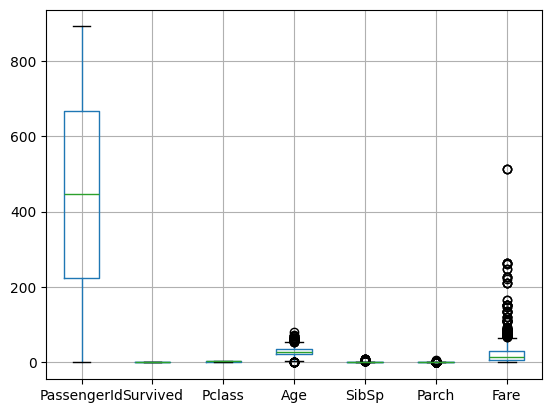

In [181]:
df_t1.boxplot()
plt.show()

Let's just say that age does have a high range so that the outliers only focus on SibSp, Parch and Fare.
Using IQR method for cleaning outliers

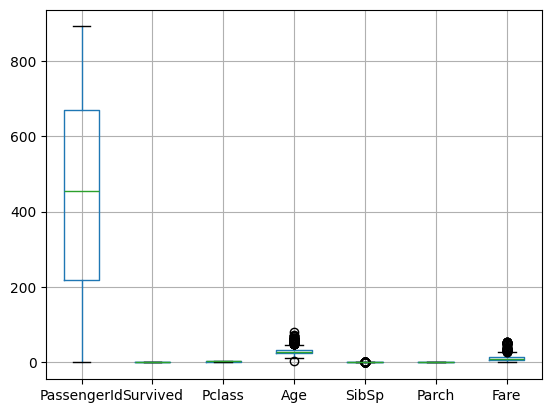

In [182]:
#remove for SibSp
Q1 = df_t1['SibSp'].quantile(0.25)
Q3 = df_t1['SibSp'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_t1 = df_t1[(df_t1['SibSp'] >= lower) & (df_t1['SibSp'] <= upper)]
# remove for Parch
Q1 = df_t1['Parch'].quantile(0.25)
Q3 = df_t1['Parch'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_t1 = df_t1[(df_t1['Parch'] >= lower) & (df_t1['Parch'] <= upper)]
# remove for Fare
Q1 = df_t1['Fare'].quantile(0.25)
Q3 = df_t1['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_t1 = df_t1[(df_t1['Fare'] >= lower) & (df_t1['Fare'] <= upper)]
df_t1.boxplot()
plt.show()

Now value is better